In [1]:
import pandas as pd
import numpy as np
from contextlib import chdir
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
with chdir(".."):
    mutations_df = pd.read_csv("results/mutations.csv")

mutations_df.head()

,Unnamed: 0,project_name,disease_type,primary_site,Hugo_Symbol,Entrez_Gene_Id,Chromosome,Start_Position,Variant_Classification
0,0,Stomach Adenocarcinoma,Adenomas and Adenocarcinomas,Stomach,OR4F5,79501,chr1,69171,Silent
1,1,Glioblastoma Multiforme,Gliomas,Brain,OR4F5,79501,chr1,69241,Missense_Mutation
2,2,"CPTAC-Brain, Head and Neck, Kidney, Lung, Panc...",Adenomas and Adenocarcinomas,"Uterus, NOS",OR4F5,79501,chr1,69252,Silent
3,3,Uterine Corpus Endometrial Carcinoma,Adenomas and Adenocarcinomas,Corpus uteri,OR4F5,79501,chr1,69345,Silent
4,4,Skin Cutaneous Melanoma,Nevi and Melanomas,"Connective, subcutaneous and other soft tissues",OR4F5,79501,chr1,69376,Missense_Mutation


In [3]:
gene = 'KRAS'

In [4]:
mutations_df = mutations_df[mutations_df['Hugo_Symbol'] == gene]
mutations_df.head()

,Unnamed: 0,project_name,disease_type,primary_site,Hugo_Symbol,Entrez_Gene_Id,Chromosome,Start_Position,Variant_Classification
666279,666279,Uterine Corpus Endometrial Carcinoma,Adenomas and Adenocarcinomas,Corpus uteri,KRAS,3845,chr12,25215485,Missense_Mutation
666280,666280,NCI Cancer Model Development for the Human Can...,Adenomas and Adenocarcinomas,Rectum,KRAS,3845,chr12,25215516,Silent
666281,666281,Uterine Corpus Endometrial Carcinoma,Adenomas and Adenocarcinomas,Corpus uteri,KRAS,3845,chr12,25215520,Missense_Mutation
666282,666282,Uterine Corpus Endometrial Carcinoma,Adenomas and Adenocarcinomas,Corpus uteri,KRAS,3845,chr12,25215520,Missense_Mutation
666283,666283,Head and Neck Squamous Cell Carcinoma,Squamous Cell Neoplasms,Palate,KRAS,3845,chr12,25215539,Missense_Mutation


In [5]:
with chdir(".."):
    intervals_df = pd.read_csv("ref_data/modified/CCDS_split.csv")

intervals_df.head()

,chrom,start,end,gene,type
0,chr1,65564.0,65572.0,OR4F5,normal
1,chr1,69036.0,69431.0,OR4F5,normal
2,chr1,69432.0,69458.0,OR4F5,SAE
3,chr1,69459.0,69626.0,OR4F5,normal
4,chr1,69627.0,69662.0,OR4F5,SAE


In [6]:
intervals_df = intervals_df[intervals_df['gene'] == gene]
intervals_df.head(20)

,chrom,start,end,gene,type
78955,chr12,25209794.0,25209808.0,KRAS,normal
78956,chr12,25209809.0,25209835.0,KRAS,SCE
78957,chr12,25209836.0,25209895.0,KRAS,normal
78958,chr12,25209896.0,25209910.0,KRAS,SAE
78959,chr12,25215440.0,25215481.0,KRAS,normal
78960,chr12,25215482.0,25215514.0,KRAS,SCE
78961,chr12,25215515.0,25215559.0,KRAS,normal
78962,chr12,25225613.0,25225624.0,KRAS,normal
78963,chr12,25225625.0,25225663.0,KRAS,SAE
78964,chr12,25225664.0,25225772.0,KRAS,normal


In [7]:
region_df = pd.DataFrame({'position': [], 'type': [], 'count': [], 'silent': [], 'missense': []})
for index, row in intervals_df.iterrows():
    for position in range(int(row['start']), int(row['end'])):
        region_df.loc[len(region_df)] = [position, row['type'], 0, 0, 0]

In [8]:
region_df.shape

(10719, 5)

In [9]:
for index, row in mutations_df.iterrows():
    region_df.loc[region_df['position'] == row['Start_Position'], 'count'] = region_df['count'] + 1

In [10]:
for index, row in mutations_df.iterrows():
    if row['Variant_Classification'] == 'Silent':
        region_df.loc[region_df['position'] == row['Start_Position'], 'silent'] = region_df['silent'] + 1

    elif row['Variant_Classification'] == 'Missense_Mutation':
        region_df.loc[region_df['position'] == row['Start_Position'], 'missense'] = region_df['missense'] + 1

In [11]:
region_df.head()

,position,type,count,silent,missense
0,25209794,normal,0,0,0
1,25209795,normal,0,0,0
2,25209796,normal,0,0,0
3,25209797,normal,0,0,0
4,25209798,normal,0,0,0


In [12]:
region_df['count_rolling_avg'] = region_df['count'].rolling(window=5).mean()
region_df['silent_rolling_avg'] = region_df['silent'].rolling(window=5).mean()
region_df['missense_rolling_avg'] = region_df['missense'].rolling(window=5).mean()

region_df['shift'] = region_df['type'] != region_df['type'].shift(1)

shifts_df = region_df[region_df['shift']].reset_index()

shifts_df['diff'] = shifts_df['index'].shift(-1) - shifts_df['index']

shifts_df.head(20)

,index,position,type,count,silent,missense,count_rolling_avg,silent_rolling_avg,missense_rolling_avg,shift,diff
0,0,25209794,normal,0,0,0,NaN,NaN,NaN,True,14.0
1,14,25209809,SCE,0,0,0,0.0,0.0,0.0,True,26.0
2,40,25209836,normal,0,0,0,0.0,0.0,0.0,True,59.0
3,99,25209896,SAE,0,0,0,0.0,0.0,0.0,True,14.0
4,113,25215440,normal,0,0,0,0.0,0.0,0.0,True,41.0
5,154,25215482,SCE,0,0,0,0.0,0.0,0.0,True,32.0
6,186,25215515,normal,0,0,0,0.0,0.0,0.0,True,55.0
7,241,25225625,SAE,0,0,0,0.0,0.0,0.0,True,38.0
8,279,25225664,normal,0,0,0,0.2,0.0,0.2,True,274.0
9,553,25227400,SAE,0,0,0,0.0,0.0,0.0,True,13.0


(0.0, 10710.0)

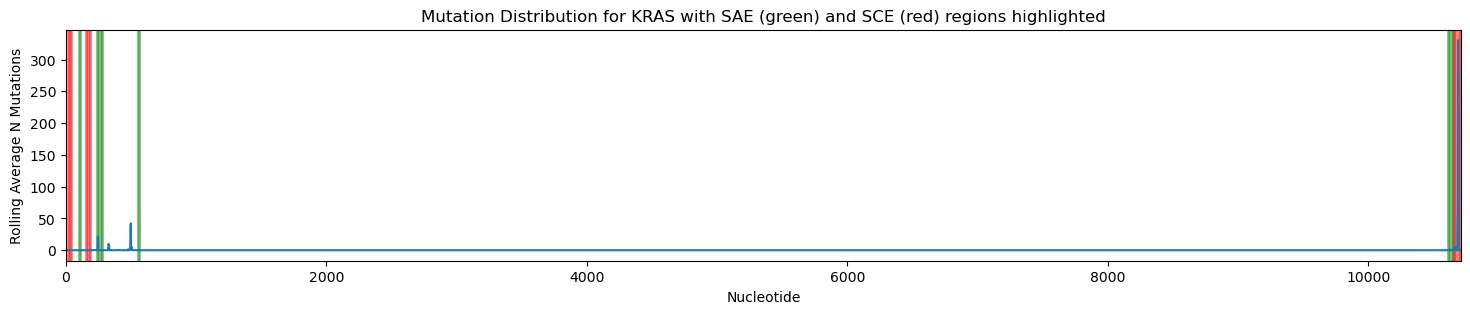

In [32]:
plt.figure(figsize=(18, 3))

ax = region_df['count_rolling_avg'].plot(kind='line')

for index, row in shifts_df.iterrows():
    if row['type'] == 'SAE':
        rect = patches.Rectangle((row['index'] , -20), int(row['diff']-1), 500, linewidth=2, edgecolor='green', facecolor='green', alpha=0.5, label='SAE')
        ax.add_patch(rect)

    elif row['type'] == 'SCE':
        rect = patches.Rectangle((row['index'] , -20), int(row['diff']-1), 500, linewidth=2, edgecolor='red', facecolor='red', alpha=0.5, label='SCE')
        ax.add_patch(rect)

#handles, labels = plt.gca().get_legend_handles_labels()
#print(handles)

#plt.legend(handles, labels, loc='upper right')

plt.title(f"Mutation Distribution for {gene} with SAE (green) and SCE (red) regions highlighted")
plt.xlabel('Nucleotide')
plt.ylabel('Rolling Average N Mutations')

ax.set_xlim(0, 10710)

(10600.0, 10710.0)

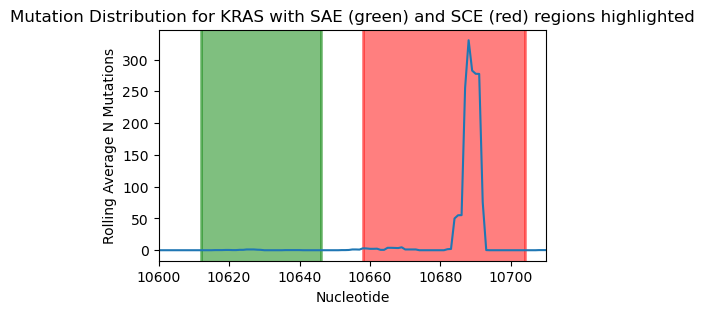

In [31]:
plt.figure(figsize=(5, 3))

ax = region_df['count_rolling_avg'].plot(kind='line')

for index, row in shifts_df.iterrows():
    if row['type'] == 'SAE':
        rect = patches.Rectangle((row['index'] , -20), int(row['diff']-1), 500, linewidth=2, edgecolor='green', facecolor='green', alpha=0.5)
        ax.add_patch(rect)

    elif row['type'] == 'SCE':
        rect = patches.Rectangle((row['index'] , -20), int(row['diff']-1), 500, linewidth=2, edgecolor='red', facecolor='red', alpha=0.5)
        ax.add_patch(rect)

plt.title(f"Mutation Distribution for {gene} with SAE (green) and SCE (red) regions highlighted")
plt.xlabel('Nucleotide')
plt.ylabel('Rolling Average N Mutations')

ax.set_xlim(10600, 10710)

(20.0, 575.0)

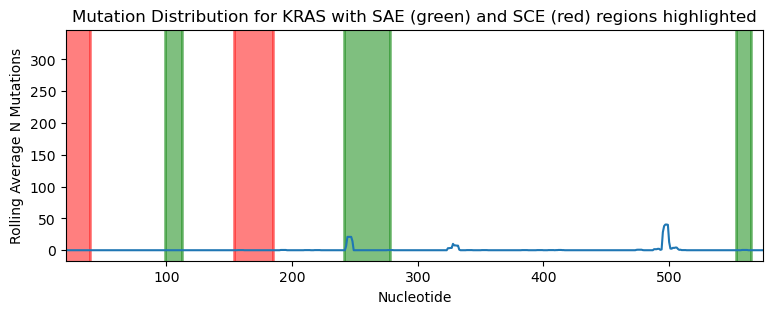

In [30]:
plt.figure(figsize=(9, 3))

ax = region_df['missense_rolling_avg'].plot(kind='line')

for index, row in shifts_df.iterrows():
    if row['type'] == 'SAE':
        rect = patches.Rectangle((row['index'] , -20), int(row['diff']-1), 500, linewidth=2, edgecolor='green', facecolor='green', alpha=0.5)
        ax.add_patch(rect)

    elif row['type'] == 'SCE':
        rect = patches.Rectangle((row['index'] , -20), int(row['diff']-1), 500, linewidth=2, edgecolor='red', facecolor='red', alpha=0.5)
        ax.add_patch(rect)

plt.title(f"Mutation Distribution for {gene} with SAE (green) and SCE (red) regions highlighted")
plt.xlabel('Nucleotide')
plt.ylabel('Rolling Average N Mutations')

ax.set_xlim(20, 575)